In [3]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
train_data = pd.read_csv("C:\\Users\PC\Desktop\data_set/training.csv")
test_data = pd.read_csv("C:\\Users\PC\Desktop\data_set/test.csv")


In [5]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [6]:
train_data.isnull().any().value_counts()


True     28
False     3
dtype: int64

In [7]:
train_data.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True)

In [8]:
train_data.isnull().any().value_counts()


False    31
dtype: int64

In [9]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    

In [10]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)

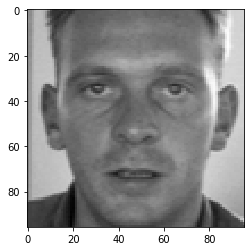

In [11]:
plt.imshow(X_train[2].reshape(96,96),cmap='gray')
plt.show()

In [12]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [1]:
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten,Input,BatchNormalization,MaxPool2D
from tensorflow.keras.models import Model
import tensorflow as tf
input_shape = (96, 96, 1)

C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
with tf.device('/device:GPU:0'):
    inp = Input(shape=(96,96,1))
    x = Conv2D(32, (6,6), activation='relu', padding='same')(inp)
    x = BatchNormalization()(x)
    
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = MaxPool2D((2,2))(x)
    x = Dropout(.2)(x)
    x = BatchNormalization()(x)
    
    x = Conv2D(64, (5,5),padding="same", activation='relu')(x)
    x = Conv2D(10, (1,1),padding="same", activation='relu')(x)

    x = BatchNormalization()(x)

    x = Conv2D(64, (3,3), activation='relu')(x)
    x = Conv2D(10, (1,1),padding="same", activation='relu')(x)

    x = MaxPool2D((2,2))(x)
    x = Dropout(.4)(x)
    x = BatchNormalization()(x)

    x = Flatten()(x)
    x = Dense(800, activation='relu')(x)
    x = Dropout(.5)(x)
    x = Dense(500, activation='relu')(x)
    x = Dropout(.5)(x)
    out = Dense(30)(x)
    
KeyPoints=Model(inputs=inp,outputs=out)
KeyPoints.summary()
    

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        1184      
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 32)        0         
_________

In [13]:
KeyPoints.compile(optimizer='adam',
             loss='mae',
              metrics=['mae'])

In [26]:
hist=KeyPoints.fit(x=X_train,y=y_train,batch_size=64,epochs=50,verbose=0,validation_split=0.2)


In [28]:
print(hist.history['loss'][-1],hist.history['val_loss'][-1])

4.020789878295233 1.4253868405700576


In [36]:
test_data


,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
...,...,...
1778,1779,101 101 101 100 100 97 97 98 102 149 214 206 1...
1779,1780,201 191 171 158 145 140 136 130 123 115 108 10...
1780,1781,28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781,1782,104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...


In [37]:
imag_test = []
for i in range(0,1783):
    imag_test = test_data['Image'][i].split(' ')
    imag_test = ['0' if x == '' else x for x in img]
    imag_test.append(imag_test)

In [38]:
imag_test = np.array(imag,dtype = 'float')
X_test = imag_test.reshape(-1,96,96,1)

In [40]:
preds = KeyPoints.predict(X_test)

In [191]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=50)
    plt.title(title)

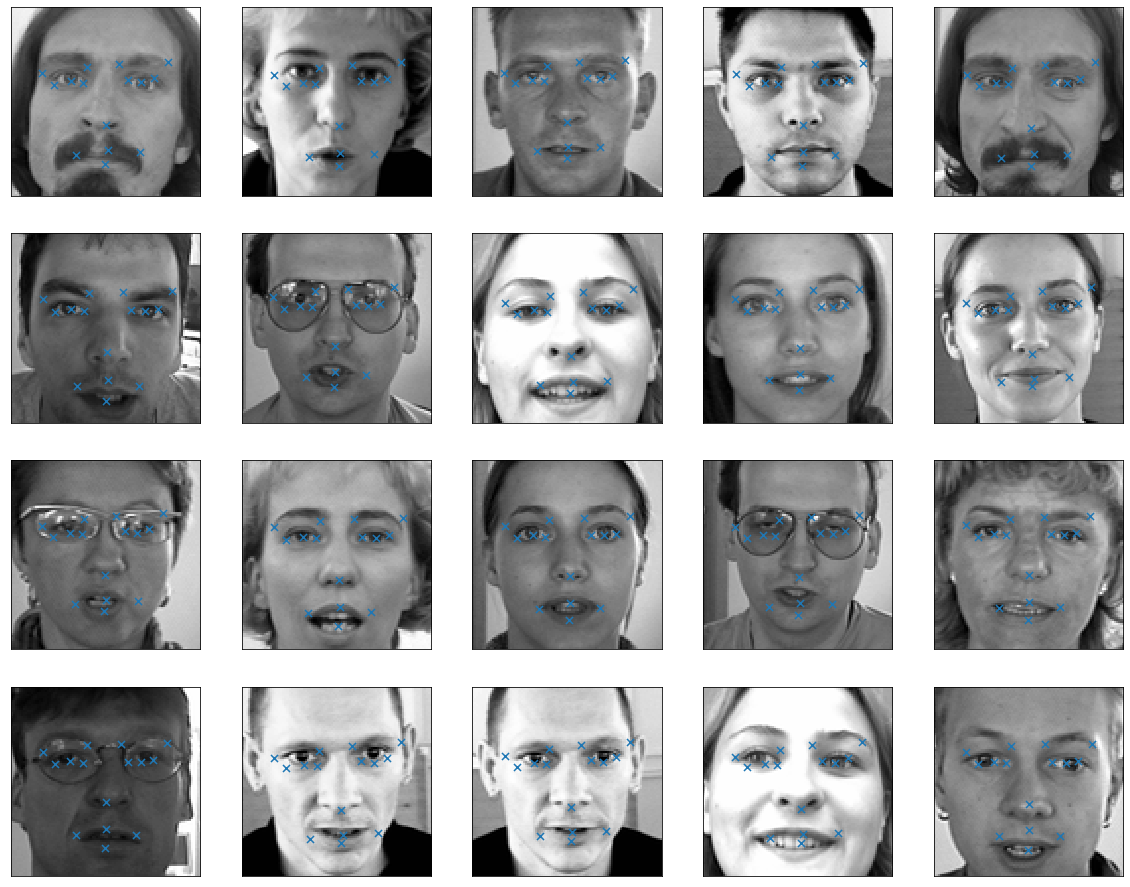

In [192]:
fig = plt.figure(figsize=(20,16))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], preds[i], axis, "")
plt.show()

In [62]:
KeyPoints.save_weights("faceKeyPoints.h5")